<a href="https://colab.research.google.com/github/blessjal/blessjal/blob/main/Brain_Cancer_Detection_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [2]:
!wget https://www.dropbox.com/s/dtw18saps0231yn/BrainTumorData.zip?d1=0

--2021-06-28 01:39:12--  https://www.dropbox.com/s/dtw18saps0231yn/BrainTumorData.zip?d1=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/dtw18saps0231yn/BrainTumorData.zip [following]
--2021-06-28 01:39:12--  https://www.dropbox.com/s/raw/dtw18saps0231yn/BrainTumorData.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca4439459bdadc56cd909379f65.dl.dropboxusercontent.com/cd/0/inline/BRQsxINzJa24BLhR1RyuDBpIa3Fs8c-EEVEWAi8MFAmX2tObOSKXbx9QerqJRR7-dpnGLn-3Di1eNY3X8Ibhr0RnYJhfJIgtjRP38r20B7hjo9Og96_aMpvQKSSmk1vveVAIyNOxWefY6IzEVeS0SK63/file# [following]
--2021-06-28 01:39:12--  https://uca4439459bdadc56cd909379f65.dl.dropboxusercontent.com/cd/0/inline/BRQsxINzJa24BLhR1RyuDBpIa3Fs8c-EEVEWAi8MFAmX2tObOSKXbx9QerqJRR7-dpn

In [3]:
!unzip /content/BrainTumorData.zip?d1=0

Archive:  /content/BrainTumorData.zip?d1=0
   creating: BrainTumorData/Brain Tumor Data Set/
   creating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1).png  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1).tif  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (10).jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (10).tif  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (100).jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1000).jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1001).jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1002).JPG  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1003).jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/

In [4]:
# count the number of images in each class
ROOT_DIR = "/content/BrainTumorData/Brain Tumor Data Set"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

In [5]:
number_of_images.items()

dict_items([('Healthey', 2087), ('Brain Tumor', 2513)])

## We will split the data such that 
* 70% for Training 
* 15% for Validation
* 15% for Testing


In [6]:

if not os.path.exists("./train"):
    os.mkdir("./train")

    for dir in os.listdir(ROOT_DIR):
        os.mkdir("./train/"+dir)

        for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir)), size=(math.floor(70/100*number_of_images[dir])-5), 
                                    replace=False):
            O = os.path.join(ROOT_DIR, dir, img)
            D = os.path.join("./train")
            shutil.copy(O,D)
            os.remove(O)
else:
    print('the folder exist')

In [7]:
def dataFolder(path, split):
    
    if not os.path.exists("./"+path):
        os.mkdir("./"+path)

        for dir in os.listdir(ROOT_DIR):
            os.mkdir("./"+path+"/"+dir)

            for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir)), size=(math.floor(split*number_of_images[dir])-5), 
                                        replace=False):
                O = os.path.join(ROOT_DIR, dir, img)
                D = os.path.join("./"+path, dir)
                shutil.copy(O,D)
                os.remove(O)
    else:
        print(f'{path} folder exist')


In [8]:
dataFolder('train', 0.7)

train folder exist


In [9]:
dataFolder('val', 0.15)

In [10]:
dataFolder('test', 0.15)

# Model building 

In [11]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [12]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))

model.add(Conv2D(filters=36, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 36)      5220      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 36)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      20800     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Preparing Data using Data Generator

In [14]:
def preprocessingImages(path):
    """ 
    input: path
    output: Preprocessed images
    """
    image_data = ImageDataGenerator(zoom_range=0.2, shear_range=0.2, rescale=1/255, horizontal_flip=True)
    image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode='binary')

    return image

In [15]:
path = "/content/train"
train_data = preprocessingImages(path)

Found 0 images belonging to 2 classes.


In [16]:
def preprocessingImages2(path):
    """ 
    input: path
    output: Preprocessed images
    """
    image_data = ImageDataGenerator(rescale=1/255)
    image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode='binary')

    return image

In [29]:
path = "/content/test"
test_data = preprocessingImages2(path)

Found 679 images belonging to 2 classes.


In [18]:
path = "/content/val"
val_data = preprocessingImages2(path)

Found 679 images belonging to 2 classes.


Early stopping and model checkpoint

In [19]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=3, verbose= 1, mode='auto')

mc = ModelCheckpoint(monitor='val_accuracy', filepath='./bestmdel.h5', verbose=1, save_best_only=True,  mode='auto')

cd = [es, mc]

# Model Training

In [20]:
history = model.fit_generator(generator=train_data, 
                              steps_per_epoch=8, 
                              epochs=30, verbose=1, 
                              validation_data=val_data, 
                              validation_steps=16, 
                              callbacks=cd)

Epoch 1/30
8/8 [==============================] - 48s 493ms/step - loss: 0.7424 - accuracy: 0.4801 - val_loss: 0.6704 - val_accuracy: 0.6211

Epoch 00001: val_accuracy improved from -inf to 0.62109, saving model to ./bestmdel.h5
Epoch 2/30
8/8 [==============================] - 3s 366ms/step - loss: 0.6608 - accuracy: 0.6330 - val_loss: 0.6269 - val_accuracy: 0.6406

Epoch 00002: val_accuracy improved from 0.62109 to 0.64062, saving model to ./bestmdel.h5
Epoch 3/30
8/8 [==============================] - 3s 369ms/step - loss: 0.6637 - accuracy: 0.6222 - val_loss: 0.6112 - val_accuracy: 0.6055

Epoch 00003: val_accuracy did not improve from 0.64062
Epoch 4/30
8/8 [==============================] - 3s 362ms/step - loss: 0.5698 - accuracy: 0.6621 - val_loss: 0.5861 - val_accuracy: 0.6973

Epoch 00004: val_accuracy improved from 0.64062 to 0.69727, saving model to ./bestmdel.h5
Epoch 5/30
8/8 [==============================] - 3s 365ms/step - loss: 0.5196 - accuracy: 0.7563 - val_loss: 0.5

 Plotting graphical interpretation

In [21]:
h = history.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

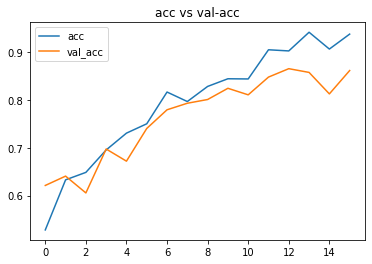

In [24]:
plt.plot(h['accuracy'], label='acc')
plt.plot(h['val_accuracy'], label='val_acc')
plt.title('acc vs val-acc')
plt.legend()

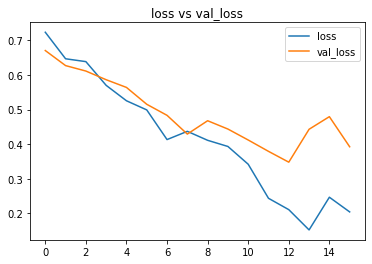

In [25]:
plt.plot(h['loss'], label='loss')
plt.plot(h['val_loss'], label='val_loss')
plt.title('loss vs val_loss')
plt.legend()

Model Accuracy

In [26]:
from keras.models import load_model

In [27]:
model = load_model('/content/bestmdel.h5')

In [31]:
acc = model.evaluate_generator(test_data)[1]
print(f'The accuracy of the model is {acc*100} %')

The accuracy of the model is 94.40353512763977 %


In [32]:
from keras.preprocessing.image import load_img, img_to_array

The MRI has a cancer


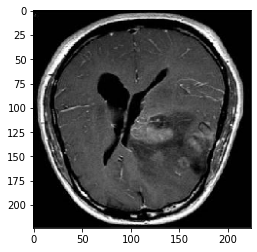

In [42]:
path = "/content/BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (999).jpg"

img = load_img(path, target_size=(224,224))
input_arr = img_to_array(img)/255

input_arr.shape
plt.imshow(input_arr)

input_arr = np.expand_dims(input_arr, axis=0)

pred = model.predict_classes(input_arr)[0][0]
pred

if pred == 0:
    print('The MRI has a cancer')

else:
    print('The MRI does not have a cancer')

In [39]:
train_data.class_indices

{'Brain Tumor': 0, 'Healthey': 1}

The MRI does not have a cancer


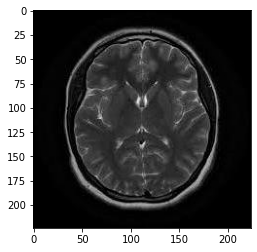

In [43]:
path = "/content/BrainTumorData/Brain Tumor Data Set/Healthey/Not Cancer  (1639).jpg"

img = load_img(path, target_size=(224,224))
input_arr = img_to_array(img)/255

input_arr.shape
plt.imshow(input_arr)

input_arr = np.expand_dims(input_arr, axis=0)

pred = model.predict_classes(input_arr)[0][0]
pred

if pred == 0:
    print('The MRI has a cancer')

else:
    print('The MRI does not have a cancer')

# Transfer Learning

* Mobile Net Architecture